In [1]:
import os
os.chdir("/content/drive/MyDrive/Projects/Pakkanodi Assignments/TV News channel dataset")

input_folder = "data/"
output_folder = "processed_data/"

channels = ["BBC", "CNN", "TIMESNOW", "CNNIBN", "NDTV"]
channel = channels[0]

import pandas as pd
import numpy as np

df = pd.read_csv(r""+output_folder+channel+"/"+channel+'.csv')

In [2]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import pandas as pd


In [4]:
def stepwise_selection(data, target, SL_in=0.05, SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []

    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()

        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())

            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()

                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)

                else:
                    break 

        else:
            break

    return best_features

In [5]:
df.columns

Index(['index', 'target', 'qid', '2', '3', '4', '5', '6', '7', '8',
       ...
       '924', '959', '1002', '1016', '1028', '1048', '1112', '1119', '4124',
       '4125'],
      dtype='object', length=232)

In [6]:
import pandas as pd

X = df.drop("target", 1)       # feature matrix
y = df['target']               # target feature

<ipython-input-6-b8b1deaf0eda>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop("target", 1)       # feature matrix


In [7]:
X

,index,qid,2,3,4,5,6,7,8,9,...,924,959,1002,1016,1028,1048,1112,1119,4124,4125
0,123,0,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,0.050768,...,0.008475,0.036017,0.006356,0.008475,0.0,0.002119,0.000000,0.0,0.422334,0.663918
1,124,0,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,0.065841,...,0.109244,0.117647,0.006303,0.000000,0.0,0.008403,0.000000,0.0,0.332664,0.766184
2,109,0,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,0.044991,...,0.074519,0.062500,0.004808,0.000000,0.0,0.009615,0.000000,0.0,0.346674,0.225022
3,86,0,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,0.043756,...,0.061728,0.046296,0.012346,0.000000,0.0,0.012346,0.003086,0.0,0.993323,0.840083
4,76,0,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,0.052617,...,0.000000,0.000000,0.003521,0.000000,0.0,0.045775,0.007042,0.0,0.341520,0.710470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17715,66,0,2.685833,3.018033,13.668181,17.187395,0.014353,0.007819,0.119271,0.060057,...,0.000000,0.008197,0.090164,0.012295,0.0,0.000000,0.000000,0.0,0.635945,0.083003
17716,33,0,1.597726,1.008243,5.417785,2.954453,0.015893,0.007553,0.125758,0.055514,...,0.000000,0.000000,0.089286,0.008929,0.0,0.000000,0.000000,0.0,0.783129,0.315349
17717,25,0,1.465399,0.702240,5.848524,3.574110,0.019303,0.009761,0.100125,0.058169,...,0.000000,0.000000,0.037500,0.000000,0.0,0.000000,0.000000,0.0,0.841387,0.011969
17718,88,0,0.668713,1.235713,4.243607,10.771485,0.018320,0.006595,0.111009,0.043714,...,0.000000,0.000000,0.003012,0.000000,0.0,0.000000,0.000000,0.0,0.022878,0.569202


In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

bde_features = stepwise_selection(X,y)
print(bde_features)

['11', '347', '104', '6', '118', '31', '32', '7', '58', '230', '92', '95', '110', '106', '215', '444', '17', '924', '102', '99', '176', '1028', '33', '23', '129', '96', '601', '109', '192', '580', '8', '16', '20', '1048', '166', '3', 'index', '221', '319', '103', '117', '114', '100', '97', '307', '127', '240', '13', '231', '406', '203', '726', '779', '852', '762', '71', '4', '816', '426', '234', '30', '111', '112', '572', '63', '709', '2', '25', '43', '108', '87', '1002', '14', '197']


## Feature selection

In [10]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,2:].to_numpy(), df.target.replace(-1, 0).to_numpy()
bde_X, y = df.loc[:, bde_features].to_numpy(), df.target.replace(-1, 0).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

bde_X_train, bde_X_test, y_train, y_test = train_test_split(bde_X, y, test_size=0.20, random_state=42)
bde_X_train, bde_X_val, y_train, y_val = train_test_split(bde_X_train, y_train, test_size=0.20, random_state=42)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

svm_model.fit(X_train, y_train)
print("Accuracy : {:.2f}%".format(svm_model.score(X_val, y_val)*100))

0.8645980253878702

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

bde_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

bde_svm_model.fit(bde_X_train, y_train)
print("Accuracy : {:.2f}%".format(bde_svm_model.score(bde_X_val, y_val)*100))

Accuracy : 8.7e+01%


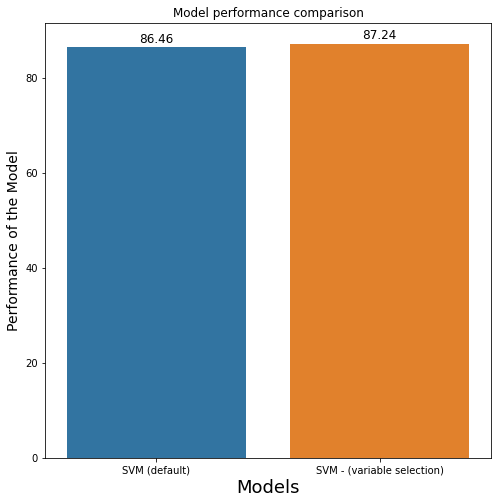

In [13]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating our own dataframe
accuracy_results = {"Model Names" : ['SVM (default)', 'SVM - (variable selection)'],
        "Accuracy": [svm_model.score(X_val, y_val)*100, 
                     bde_svm_model.score(bde_X_val, y_val)*100, ]}
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Models", size=18)
 
# Setting the label for y-axis
plt.ylabel("Performance of the Model", size=14)

# Setting the title for the graph
plt.title("Model performance comparison")

# Finally showing the plot
plt.show()

In [14]:
features = df.iloc[:,2:].columns

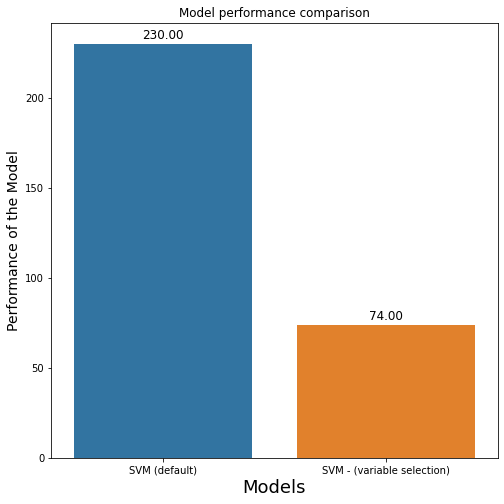

In [15]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating our own dataframe
accuracy_results = {"Model Names" : ['SVM (default)', 'SVM - (variable selection)'],
        "Accuracy": [len(features), 
                     len(bde_features), ]}
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Models", size=18)
 
# Setting the label for y-axis
plt.ylabel("Performance of the Model", size=14)

# Setting the title for the graph
plt.title("Model performance comparison")

# Finally showing the plot
plt.show()